In [1]:
#Importing all necessary files 
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report

/Users/atmanadhyapak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Fetch historical S&P 500 index data from Yahoo Finance
sp500 = yf.Ticker("^GSPC").history(period="max").copy()

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-23 00:00:00-05:00,6907.850098,6932.959961,6895.500000,6915.609863,4871930000,0.0,0.0
2026-01-26 00:00:00-05:00,6923.229980,6964.660156,6921.600098,6950.229980,4968050000,0.0,0.0
2026-01-27 00:00:00-05:00,6965.959961,6988.819824,6958.830078,6978.600098,5331720000,0.0,0.0


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2026-01-15 00:00:00-05:00', '2026-01-16 00:00:00-05:00',
               '2026-01-20 00:00:00-05:00', '2026-01-21 00:00:00-05:00',
               '2026-01-22 00:00:00-05:00', '2026-01-23 00:00:00-05:00',
               '2026-01-26 00:00:00-05:00', '2026-01-27 00:00:00-05:00',
               '2026-01-28 00:00:00-05:00', '2026-01-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24636, freq=None)

<Axes: xlabel='Date'>

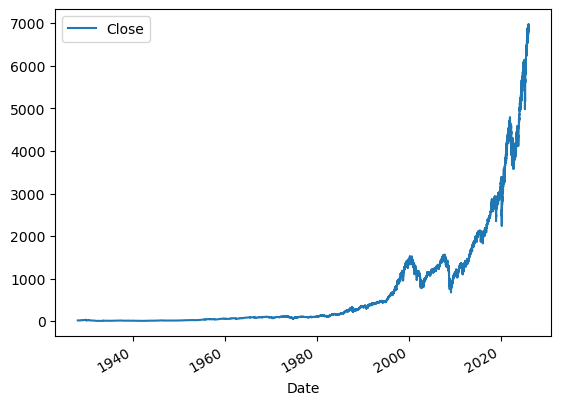

In [5]:
#Visualize the S&P 500 closing price over time
sp500.plot.line(y="Close", use_index=True)

In [6]:
#Create a one-day-ahead target reference for supervised learning
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [7]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2026-01-23 00:00:00-05:00,6907.850098,6932.959961,6895.500000,6915.609863,4871930000,0.0,0.0,6950.229980
2026-01-26 00:00:00-05:00,6923.229980,6964.660156,6921.600098,6950.229980,4968050000,0.0,0.0,6978.600098
2026-01-27 00:00:00-05:00,6965.959961,6988.819824,6958.830078,6978.600098,5331720000,0.0,0.0,6978.029785


In [8]:
#Define the binary prediction target: 1 if the market goes up tomorrow, else 0
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [9]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2026-01-23 00:00:00-05:00,6907.850098,6932.959961,6895.500000,6915.609863,4871930000,0.0,0.0,6950.229980,1
2026-01-26 00:00:00-05:00,6923.229980,6964.660156,6921.600098,6950.229980,4968050000,0.0,0.0,6978.600098,1
2026-01-27 00:00:00-05:00,6965.959961,6988.819824,6958.830078,6978.600098,5331720000,0.0,0.0,6978.029785,0


In [10]:
#Restrict the dataset to modern market data and remove unused columns if present
sp500 = sp500.loc["1990-01-01":].copy()
sp500 = sp500.drop(columns=["Stock Splits", "Dividends"], errors="ignore")

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2026-01-23 00:00:00-05:00,6907.850098,6932.959961,6895.500000,6915.609863,4871930000,6950.229980,1
2026-01-26 00:00:00-05:00,6923.229980,6964.660156,6921.600098,6950.229980,4968050000,6978.600098,1
2026-01-27 00:00:00-05:00,6965.959961,6988.819824,6958.830078,6978.600098,5331720000,6978.029785,0


In [12]:
#Gap up or down overnight
sp500.loc[:, "Overnight_Return"] = (sp500["Open"] - sp500["Close"].shift(1)) / sp500["Close"].shift(1)

In [13]:
#Feature engineering: create price-based, trend, and volatility signals
#to help the model capture short-, medium-, and long-term market behavior

#Overnight return captures gap movement between yesterday's close and today's open
sp500["Overnight_Return"] = (
    sp500["Open"] - sp500["Close"].shift(1)
) / sp500["Close"].shift(1)

#Daily return used for volatility estimation
sp500["Daily_Return"] = sp500["Close"].pct_change()

#Rolling horizon features capture market behavior across multiple time scales
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    #Rolling mean used to normalize current price level
    rolling_averages = sp500.rolling(horizon).mean()

    #Price relative to its rolling average (momentum / mean-reversion signal)
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    #Rolling count of prior up days (trend strength signal)
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    #Rolling volatility of daily returns (risk / uncertainty signal)
    vol_column = f"Volatility_{horizon}"
    sp500[vol_column] = sp500["Daily_Return"].rolling(horizon).std()

    new_predictors += [ratio_column, trend_column, vol_column]

#Remove rows with insufficient historical data for rolling features
sp500 = sp500.dropna()

In [14]:
#Initialize and train a Random Forest classifier using engineered features,
#splitting the dataset into a training set and a recent holdout test set

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=100,
    random_state=1
)

#Use all but the most recent 100 days for training, reserving recent data for testing
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

#Select engineered features as model inputs
predictors = new_predictors + ["Overnight_Return"]

#Fit the model on historical data
model.fit(train[predictors], train["Target"])

#Store the exact feature order used during training for consistency
predictors = model.feature_names_in_.tolist()

In [15]:
#Generate thresholded predictions for a given train/test split and
#return a DataFrame aligned by date for evaluation and backtesting
def predict(train, test, predictors, model, threshold=0.55):
    model.fit(train[predictors], train["Target"])
    probs = model.predict_proba(test[predictors])[:, 1]
    preds = (probs >= threshold).astype(int)

    preds = pd.Series(preds, index=test.index, name="Predictions")
    return pd.concat([test["Target"], preds], axis=1)

In [16]:
#Perform a rolling backtest to evaluate model performance across time,
#retraining on expanding windows and testing on fixed future intervals
def backtest(data, model, predictors, start=2500, step=250, threshold=0.55):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:i+step].copy()

        all_predictions.append(
            predict(train, test, predictors, model, threshold=threshold)
        )

    return pd.concat(all_predictions)

In [17]:
#Step 1: get probabilities for the positive class
probs = model.predict_proba(test[predictors])[:, 1]

#Step 2: convert probabilities to predictions using a threshold
#Threshold selected based on precision-recall curve analysis (see below)
threshold = 0.55
preds = (probs > threshold).astype(int)

In [18]:
model.feature_names_in_

array(['Close_Ratio_2', 'Trend_2', 'Volatility_2', 'Close_Ratio_5',
       'Trend_5', 'Volatility_5', 'Close_Ratio_60', 'Trend_60',
       'Volatility_60', 'Close_Ratio_250', 'Trend_250', 'Volatility_250',
       'Close_Ratio_1000', 'Trend_1000', 'Volatility_1000',
       'Overnight_Return'], dtype=object)

In [19]:
np.unique(preds, return_counts=True)

(array([0, 1]), array([87, 13]))

In [20]:
#Evaluate prediction precision on the held-out test set
precision_score(test["Target"], preds)

0.6923076923076923

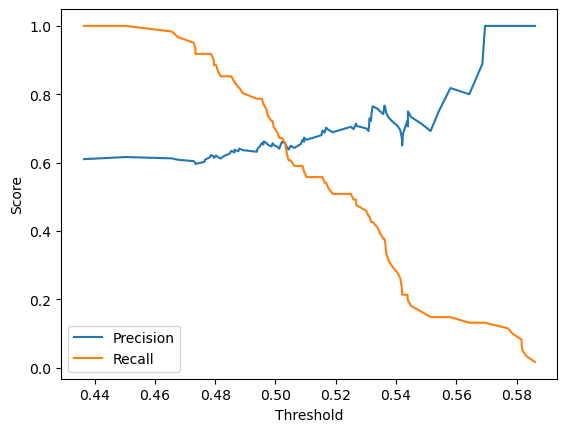

In [21]:
# Analyze precision–recall tradeoff to select an appropriate probability threshold
# for converting model probabilities into binary predictions
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test["Target"], probs)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [22]:
combined = predict(train, test, predictors, model, threshold=0.55)
combined

,Target,Predictions
Date,,
2025-09-05 00:00:00-04:00,1,1
2025-09-08 00:00:00-04:00,1,0
2025-09-09 00:00:00-04:00,1,0
2025-09-10 00:00:00-04:00,1,0
2025-09-11 00:00:00-04:00,0,0
...,...,...
2026-01-22 00:00:00-05:00,1,1
2026-01-23 00:00:00-05:00,1,0
2026-01-26 00:00:00-05:00,1,0


<Axes: xlabel='Date'>

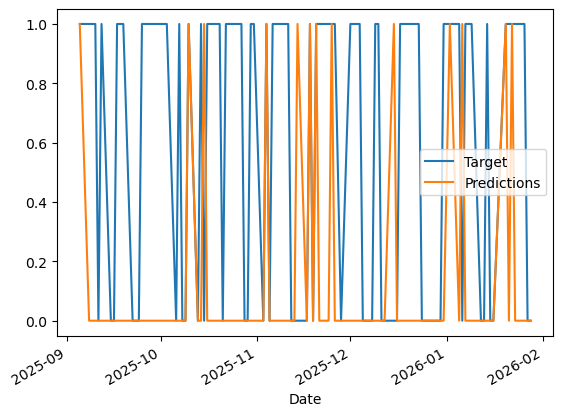

In [23]:
combined.plot()

In [24]:
#Run a full rolling backtest to generate out-of-sample predictions
#across the entire historical dataset
predictions = backtest(sp500, model, predictors)

In [25]:
#How many times each prediction was made 
predictions["Predictions"].value_counts()

Predictions
0    3775
1    1810
Name: count, dtype: int64

In [26]:
#Evaluate overall model precision across the full rolling backtest
precision_score(predictions["Target"], predictions["Predictions"])

0.5558011049723757

In [27]:
#Inspect the class distribution of true market outcomes in the backtest
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.54718
0    0.45282
Name: count, dtype: float64

In [28]:
#Compute and compare cumulative returns of the model-driven strategy
#versus a buy-and-hold benchmark using out-of-sample predictions

#Align daily returns to the same index as predictions
daily_ret = sp500["Daily_Return"].reindex(predictions.index)

#Use yesterday's prediction to take today's return (no look-ahead)
position = predictions["Predictions"].shift(1).fillna(0)

#Strategy return: earn market return only when position == 1
strategy_ret = position * daily_ret

#Buy & hold return (always in market)
buyhold_ret = daily_ret

#Cumulative curves
strategy_cum = (1 + strategy_ret.fillna(0)).cumprod()
buyhold_cum = (1 + buyhold_ret.fillna(0)).cumprod()

print("Final Cumulative - Strategy:", strategy_cum.iloc[-1])
print("Final Cumulative - Buy & Hold:", buyhold_cum.iloc[-1])

Final Cumulative - Strategy: 3.615247539139456
Final Cumulative - Buy & Hold: 6.5929361587774915


In [29]:
#Remove missing values to ensure clean return calculations
strategy_returns = strategy_ret.dropna()

#Compute total compounded return of the strategy
total_return = (1 + strategy_returns).prod() - 1

#Convert total return into an annualized return (252 trading days)
annualized_return = (1 + total_return) ** (252 / len(strategy_returns)) - 1

#Annualized volatility of strategy returns
volatility = strategy_returns.std() * np.sqrt(252)

#Risk-adjusted return metric (assumes zero risk-free rate)
sharpe_ratio = annualized_return / volatility if volatility != 0 else np.nan

#Compute cumulative equity curve
cumulative = (1 + strategy_returns).cumprod()

#Track the running peak of the equity curve
rolling_max = cumulative.cummax()

#Measure drawdowns from peak equity
drawdown = (cumulative - rolling_max) / rolling_max

#Maximum drawdown observed over the backtest
max_drawdown = drawdown.min()

#Display performance metrics
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")


Total Return: 261.52%
Annualized Return: 5.97%
Volatility: 11.59%
Sharpe Ratio: 0.51
Max Drawdown: -19.31%


In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Overnight_Return,Daily_Return,Close_Ratio_2,...,Volatility_5,Close_Ratio_60,Trend_60,Volatility_60,Close_Ratio_250,Trend_250,Volatility_250,Close_Ratio_1000,Trend_1000,Volatility_1000
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.000064,-0.005669,0.997157,...,0.003739,1.000283,32.0,0.004454,1.028047,127.0,0.005485,1.176082,512.0,0.007904
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.000000,-0.002635,0.998681,...,0.003747,0.997329,32.0,0.004424,1.025151,126.0,0.005424,1.172676,512.0,0.007904
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,0.000043,0.003248,1.001621,...,0.003995,1.000311,32.0,0.004349,1.028274,127.0,0.005426,1.176163,513.0,0.007899
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,0.000000,0.006561,1.003270,...,0.005039,1.006561,32.0,0.004407,1.034781,128.0,0.005441,1.183537,514.0,0.007895
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.000000,-0.001136,0.999431,...,0.004846,1.005120,32.0,0.004411,1.033359,128.0,0.005438,1.181856,513.0,0.007894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-22 00:00:00-05:00,6914.439941,6934.750000,6893.620117,6913.350098,5307580000,6915.609863,1,0.005646,0.005488,1.002736,...,0.012211,1.011674,35.0,0.007559,1.102389,143.0,0.011755,1.371577,536.0,0.011183
2026-01-23 00:00:00-05:00,6907.850098,6932.959961,6895.500000,6915.609863,4871930000,6950.229980,1,-0.000796,0.000327,1.000163,...,0.012118,1.011905,35.0,0.007394,1.102177,144.0,0.011753,1.371320,537.0,0.011181
2026-01-26 00:00:00-05:00,6923.229980,6964.660156,6921.600098,6950.229980,4968050000,6978.600098,1,0.001102,0.005006,1.002497,...,0.012393,1.016823,35.0,0.007416,1.107033,145.0,0.011717,1.377497,537.0,0.011157


In [31]:
# Reinitialize the Random Forest model with tuned hyperparameters 
#to increase model capacity while controlling overfitting
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [32]:
#Run a full rolling backtest using the trained model and selected predictors
predictions = backtest(sp500, model, predictors)

In [33]:
#Inspect the distribution of model predictions (UP vs DOWN signals)
predictions["Predictions"].value_counts()

Predictions
0    3880
1    1705
Name: count, dtype: int64

In [34]:
#Compute overall precision of the model across the full rolling backtest
precision_score(predictions["Target"], predictions["Predictions"])

0.5794721407624633